In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Working with data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ml_practice/logistic_regression/insurance_data.csv')
df.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


Check the data with scatter plot

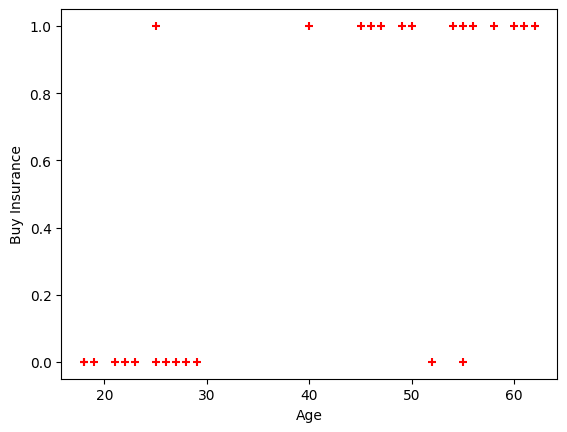

In [4]:
plt.xlabel('Age')
plt.ylabel('Buy Insurance')
plt.scatter(df.age,df.bought_insurance, color='red',marker='+')

- We use Sigmoid for classification instead of linear equation for regression, is because the sigmoid equation squashes any values between 0 and 1, better for classification.
- Decision boundary stays linear, The curve looks nonlinear.
- Linear regression gives a score, Sigmoid converts the score into a confidence

Train Test Split data

In [5]:
df.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.2)

In [10]:
X_test

,age
13,29
23,45
7,60
24,50
15,55
0,22


In [11]:
y_test

,bought_insurance
13,0
23,1
7,1
24,1
15,1
0,0


Train the model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression()

In [15]:
clf.fit(X_train,y_train)

LogisticRegression()

In [16]:
clf.predict(X_test)

array([0, 1, 1, 1, 1, 0])

Checking accuracy for the model

In [17]:
clf.score(X_test, y_test)

1.0

To predict the probability of test sample

In [19]:
clf.predict_proba(X_test)

array([[0.77739067, 0.22260933],
       [0.35915497, 0.64084503],
       [0.09160074, 0.90839926],
       [0.24034834, 0.75965166],
       [0.15154844, 0.84845156],
       [0.88604423, 0.11395577]])

## Exercise

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
df_emp = pd.read_csv('/content/drive/MyDrive/ml_practice/logistic_regression/HR_comma_sep.csv')
df_emp.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Exploratory Data Analysis - examining data in order to see how many employees have left company considering which high parameters/ features from file

In [25]:
df_emp.shape

(14999, 10)

In [23]:
left = df_emp[df_emp.left==1]
left.shape

(3571, 10)

In [24]:
retention = df_emp[df_emp.left==0]
retention.shape

(11428, 10)

In [28]:
df_emp.groupby('left').mean(numeric_only=True) # as there are string columns in file, we have specify only the numeric_only

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the above output,
- the satisfaction level is very low for people who left
- left employees worked more hours than the stayed
- the promotion was very rare among the employees left

<Axes: xlabel='salary'>

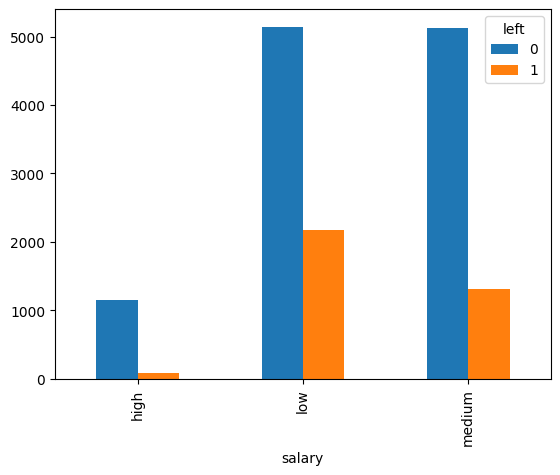

In [31]:
pd.crosstab(df_emp.salary,df_emp.left).plot(kind='bar')

From the above graph, we know that employees getting higher salary leaves company very rarely.

<Axes: xlabel='Department'>

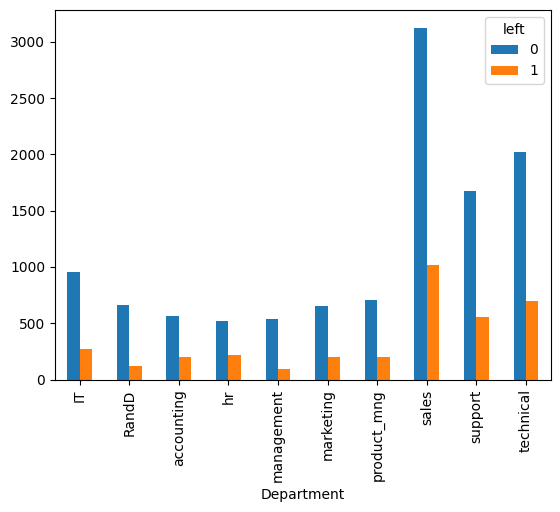

In [32]:
pd.crosstab(df_emp.Department,df_emp.left).plot(kind='bar')

Taking only needed features/columns from data

In [54]:
subdf_emp = df_emp[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf_emp.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


categorizing features via salary and getting its dummy variables

In [55]:
salary_dummies = pd.get_dummies(subdf_emp.salary,  prefix ='salary', dtype=int) # prefix -> name of column
salary_dummies.head(5)

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [56]:
merge = pd.concat([subdf_emp, salary_dummies], axis = 'columns')
merge.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Dropping textual column and one of dummy variables because of the chances of dummy variable trap

In [58]:
final_subdf = merge.drop(['salary','salary_high'], axis='columns')
final_subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [69]:
X_emp = final_subdf
X_emp.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [70]:
y_emp = df_emp.left
y_emp.head(5)

,left
0,1
1,1
2,1
3,1
4,1


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_emp, y_emp, test_size = 0.3)

In [72]:
model_clf = LogisticRegression()

In [73]:
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
model.score(X_emp, y_emp)

0.7763850923394893